In [98]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pandas_datareader import data as pdr
from scipy.cluster.hierarchy import linkage, fcluster
from itertools import combinations
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('CRSPDaily2015to20220331.csv', dtype={'date': str})
sp500 = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
)[0]
tickers = sp500['Symbol'].str.replace('.', '-').tolist()
df = df[df['TICKER'].isin(tickers)]

In [ ]:
df.head(20)

,PERMNO,date,NAMEENDT,SHRCD,EXCHCD,SICCD,NCUSIP,TICKER,COMNAM,SHRCLS,...,CFACPR,CFACSHR,OPENPRC,NUMTRD,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn
13962,10104,20150102,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,1.0,1.0,45.02,NaN,-0.014232,-0.000245,-0.000390,0.001470,0.001432,-0.000340
13963,10104,20150105,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,1.0,1.0,44.16,NaN,-0.016693,-0.018293,-0.018345,-0.012534,-0.012630,-0.018278
13964,10104,20150106,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,1.0,1.0,44.06,NaN,-0.010323,-0.009672,-0.009674,-0.010157,-0.010176,-0.008893
13965,10104,20150107,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,1.0,1.0,43.33,NaN,0.000232,0.011123,0.010917,0.008010,0.007982,0.011630
13966,10104,20150108,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,1.0,1.0,43.63,NaN,0.006025,0.016860,0.016833,0.013097,0.013030,0.017888


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.sort_values(['PERMNO', 'date'], inplace=True)
df['log_return'] = df.groupby('PERMNO')['PRC'].transform(
    lambda x: np.log(x / x.shift(1))
)
df.dropna(subset=['log_return'], inplace=True)

In [32]:
df.head()

,PERMNO,date,NAMEENDT,SHRCD,EXCHCD,SICCD,NCUSIP,TICKER,COMNAM,SHRCLS,...,CFACSHR,OPENPRC,NUMTRD,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn,log_return
13964,10104,2015-01-06,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,1.0,44.06,NaN,-0.010323,-0.009672,-0.009674,-0.010157,-0.010176,-0.008893,-0.010377
13965,10104,2015-01-07,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,1.0,43.33,NaN,0.000232,0.011123,0.010917,0.008010,0.007982,0.011630,0.000232
13966,10104,2015-01-08,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,1.0,43.63,NaN,0.006025,0.016860,0.016833,0.013097,0.013030,0.017888,0.006007
13967,10104,2015-01-09,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,1.0,43.98,NaN,-0.000461,-0.007552,-0.007558,-0.004116,-0.004126,-0.008404,-0.000461
13968,10104,2015-01-12,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,1.0,43.26,NaN,-0.002766,-0.007791,-0.007794,-0.004682,-0.004698,-0.008094,-0.002769


In [33]:
mu, sigma = df['log_return'].mean(), df['log_return'].std()
df['log_return'] = df['log_return'].clip(mu - 2*sigma, mu + 2*sigma)

In [34]:
df.head()

,PERMNO,date,NAMEENDT,SHRCD,EXCHCD,SICCD,NCUSIP,TICKER,COMNAM,SHRCLS,...,CFACSHR,OPENPRC,NUMTRD,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn,log_return
13964,10104,2015-01-06,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,1.0,44.06,NaN,-0.010323,-0.009672,-0.009674,-0.010157,-0.010176,-0.008893,-0.010377
13965,10104,2015-01-07,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,1.0,43.33,NaN,0.000232,0.011123,0.010917,0.008010,0.007982,0.011630,0.000232
13966,10104,2015-01-08,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,1.0,43.63,NaN,0.006025,0.016860,0.016833,0.013097,0.013030,0.017888,0.006007
13967,10104,2015-01-09,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,1.0,43.98,NaN,-0.000461,-0.007552,-0.007558,-0.004116,-0.004126,-0.008404,-0.000461
13968,10104,2015-01-12,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,1.0,43.26,NaN,-0.002766,-0.007791,-0.007794,-0.004682,-0.004698,-0.008094,-0.002769


In [ ]:
ff = pdr.DataReader(
    'F-F_Research_Data_5_Factors_2x3_daily', 'famafrench', start='2015-01-01'
)[0]
if isinstance(ff.index, pd.PeriodIndex):
    ff.index = ff.index.to_timestamp()
ff = ff.div(100)
ff.columns = ['MKT_RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']
df = df.merge(ff, left_on='date', right_index=True, how='left')
df.dropna(subset=['RF'], inplace=True)

In [36]:
df.head()

,PERMNO,date,NAMEENDT,SHRCD,EXCHCD,SICCD,NCUSIP,TICKER,COMNAM,SHRCLS,...,ewretd,ewretx,sprtrn,log_return,MKT_RF,SMB,HML,RMW,CMA,RF
13964,10104,2015-01-06,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,-0.010157,-0.010176,-0.008893,-0.010377,-0.0104,-0.0078,-0.0031,0.0053,0.0002,0.0
13965,10104,2015-01-07,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,0.008010,0.007982,0.011630,0.000232,0.0119,0.0017,-0.0066,0.0025,-0.0014,0.0
13966,10104,2015-01-08,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,0.013097,0.013030,0.017888,0.006007,0.0181,-0.0010,-0.0028,0.0011,-0.0016,0.0
13967,10104,2015-01-09,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,-0.004116,-0.004126,-0.008404,-0.000461,-0.0085,-0.0002,-0.0047,-0.0012,-0.0016,0.0
13968,10104,2015-01-12,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,-0.004682,-0.004698,-0.008094,-0.002769,-0.0079,0.0035,-0.0045,0.0015,0.0017,0.0


In [ ]:
excess = df['log_return'] - df['RF']
df['excess_return'] = excess

def rolling_resid(group):
    y = group['excess_return'].to_numpy()
    X = sm.add_constant(group[['MKT_RF','SMB','HML','RMW','CMA']]).to_numpy()
    res = np.full(len(y), np.nan)
    for i in range(252, len(y)+1):
        beta, *_ = np.linalg.lstsq(X[i-252:i], y[i-252:i], rcond=None)
        res[i-1] = y[i-1] - X[i-1] @ beta
    return pd.Series(res, index=group.index)

df['idio_ret'] = df.groupby('PERMNO', group_keys=False).apply(rolling_resid)
df.dropna(subset=['idio_ret'], inplace=True)

In [38]:
df.head()

,PERMNO,date,NAMEENDT,SHRCD,EXCHCD,SICCD,NCUSIP,TICKER,COMNAM,SHRCLS,...,sprtrn,log_return,MKT_RF,SMB,HML,RMW,CMA,RF,excess_return,idio_ret
14215,10104,2016-01-05,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,0.002012,-0.003082,0.0012,-0.0024,0.0001,0.0005,0.0031,0.0,-0.003082,-0.002864
14216,10104,2016-01-06,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,-0.013115,0.005038,-0.0135,-0.0023,0.0000,0.0015,0.0003,0.0,0.005038,0.019179
14217,10104,2016-01-07,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,-0.023700,-0.022016,-0.0244,-0.0029,0.0008,0.0049,0.0036,0.0,-0.022016,0.003001
14218,10104,2016-01-08,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,-0.010838,-0.011193,-0.0111,-0.0052,-0.0003,0.0025,0.0005,0.0,-0.011193,0.000047
14219,10104,2016-01-11,NaN,11.0,1.0,7372,68389X10,ORCL,ORACLE CORP,NaN,...,0.000853,0.008335,-0.0006,-0.0061,0.0040,0.0065,0.0034,0.0,0.008335,0.006977


In [ ]:
month_ends = df.groupby(df['date'].dt.to_period('M'))['date'].max()
records = []
all_dates = df['date'].drop_duplicates().sort_values()
for t in month_ends:
    eligible = all_dates[all_dates <= t]
    if len(eligible) < 252:
        continue
    start = eligible.iloc[-252]
    window = df[(df['date'] >= start) & (df['date'] <= t)]
    mat = (
        window
          .pivot_table(
              index='date',
              columns='PERMNO',
              values='idio_ret',
              aggfunc='mean'
          )
          .dropna(axis=1, thresh=200)
          .ffill()
          .bfill()
    )
    if mat.shape[1] < 2:
        continue
    dist = 1 - np.abs(mat.corr())
    labels = fcluster(linkage(dist, 'ward'), 25, criterion='maxclust')
    records.append(pd.DataFrame({'date': t, 'PERMNO': mat.columns, 'cluster': labels}))
clusters = pd.concat(records, ignore_index=True)

In [ ]:
df.head()

In [53]:
cluster_tickers = clusters.merge(
    df[['PERMNO','TICKER']].drop_duplicates(),
    on='PERMNO',
    how='left'
)

date_of_interest = cluster_tickers['date'].max()

tickers_per_cluster = (
    cluster_tickers[cluster_tickers['date'] == date_of_interest]
      .groupby('cluster')['TICKER']
      .apply(list)
      .sort_index()
)
print(f"Tickers per cluster on {date_of_interest.date()}:")
print(tickers_per_cluster)

all_clusters = {
    d: grp.groupby('cluster')['TICKER'].apply(list).to_dict()
    for d, grp in cluster_tickers.groupby('date')
}

import pprint
pprint.pprint(all_clusters[date_of_interest])

Tickers per cluster on 2022-03-31:
cluster
1                  [VICI, FRT, VTR, KIM, REG, SPG, BXP]
2     [DOC, INVH, UDR, PSA, CPT, EQR, MAA, AVB, ESS,...
3     [KO, PEP, KHC, HSY, GIS, KMB, PG, CL, CHD, CPB...
4     [ED, DTE, EIX, SO, EXC, CNP, PPL, FE, CMS, WEC...
5     [XOM, TRGP, KMI, MPC, PSX, FANG, COP, SLB, CVX...
6     [CFG, NEM, FITB, RF, MTB, WFC, HBAN, PNC, KEY,...
7     [SYF, JPM, BK, AFL, NTRS, AXP, BAC, GL, AIG, M...
8     [NXPI, AMAT, TXN, SWKS, KLAC, LRCX, TER, MU, A...
9     [MSFT, CHTR, MO, AMGN, GOOG, LW, KR, KDP, JNJ,...
10    [CVS, WBA, CAH, HUM, CI, MCK, HSIC, CNC, MOH, ...
11             [MDT, COO, SYK, BSX, STE, EW, ISRG, ZBH]
12    [IBM, HCA, PCG, VST, WRB, CINF, L, UNP, TRV, C...
13                            [LEN, PHM, DHI, NVR, LEN]
14    [MAS, SHW, WY, JBHT, SWK, GPC, TGT, HAS, SNA, ...
15    [TROW, HON, ADM, LYB, VMC, DD, LIN, DOW, CAT, ...
16    [GE, NWSA, NWS, FOXA, FOX, BA, HWM, DIS, OMC, ...
17    [ABBV, MTCH, MRNA, UBER, BMY, PFE, MRK, TJX, M...
18   

In [54]:
date_of_interest = cluster_tickers['date'].max()
counts_per_cluster = (
    cluster_tickers[cluster_tickers['date'] == date_of_interest]
      .groupby('cluster')['TICKER']
      .count()
      .sort_index()
)
print(f"Number of tickers per cluster on {date_of_interest.date()}:")
print(counts_per_cluster)

counts_all = (
    cluster_tickers
      .groupby(['date','cluster'])
      .size()
      .reset_index(name='n_tickers')
      .sort_values(['date','cluster'])
)
print(counts_all)

Number of tickers per cluster on 2022-03-31:
cluster
1      7
2     19
3     18
4     26
5     19
6     11
7     22
8     16
9     24
10    10
11     8
12    20
13     5
14    31
15    40
16    17
17    23
18    61
19    15
20     7
21    18
22    15
23    20
24     7
25    14
Name: TICKER, dtype: int64
           date  cluster  n_tickers
0    2016-12-30        1         16
1    2016-12-30        2         22
2    2016-12-30        3         26
3    2016-12-30        4         16
4    2016-12-30        5          9
...         ...      ...        ...
1595 2022-03-31       21         18
1596 2022-03-31       22         15
1597 2022-03-31       23         20
1598 2022-03-31       24          7
1599 2022-03-31       25         14

[1600 rows x 3 columns]


In [130]:
def backtest(panel, pairs, entry_z=5, exit_z=1, return_pnl_dict=False):
    pnl_matrix = []
    pnl_by_pair = {}
    skipped = 0
    for i, j in pairs:
        if i not in panel or j not in panel: continue
        sp = panel[i] - panel[j]
        mu = sp.rolling(252).mean()
        sd = sp.rolling(252).std()
        valid = (sd > 1e-6)
        z = (sp - mu) / sd
        z = z.where(valid)

        pos = (z > entry_z).astype(int) - (z < -entry_z).astype(int)
        pos = pos.replace(0, np.nan).ffill().fillna(0)
        pos = pos.mask((pos == 1) & (z.abs() < exit_z), 0)
        pos = pos.mask((pos == -1) & (z.abs() < exit_z), 0)
        pnl = pos.shift() * sp.diff()
        if pnl.abs().sum().item() == 0:
            skipped += 1
            continue
        pnl = pnl.fillna(0)
        pnl_matrix.append(pnl)
        if return_pnl_dict:
            pnl_by_pair[(i, j)] = pnl
    if skipped > 0:
        print(f"[Backtest] Skipped {skipped} pairs due to invalid or flat z-scores.")
    if pnl_matrix:
        pnl_df = pd.concat(pnl_matrix, axis=1)
        if return_pnl_dict:
            return pnl_df.mean(axis=1), pnl_by_pair
        return pnl_df.mean(axis=1)
    else:
        if return_pnl_dict:
            return pd.Series(0, index=panel.index), {}
        return pd.Series(0, index=panel.index)

In [131]:
last = clusters['date'].max()
perm_by_cluster = clusters[clusters['date']==last].groupby('cluster')['PERMNO'].apply(list)
pairs = [c for lst in perm_by_cluster if len(lst)>1 for c in combinations(lst, 2)]
idio_panel = df.pivot_table(index='date', columns='PERMNO', values='idio_ret', aggfunc='mean')
idios = sorted(set([i for pair in pairs for i in pair if i in idio_panel.columns]))
idio_panel = idio_panel[idios]
pnl_cluster, pnl_by_pair = backtest(idio_panel, pairs, return_pnl_dict=True)

[Backtest] Skipped 3846 pairs due to invalid or flat z-scores.


In [132]:
pair_returns = {pair: pnl.sum() for pair, pnl in pnl_by_pair.items()}
worst_pairs = sorted(pair_returns.items(), key=lambda x: x[1])[:3]

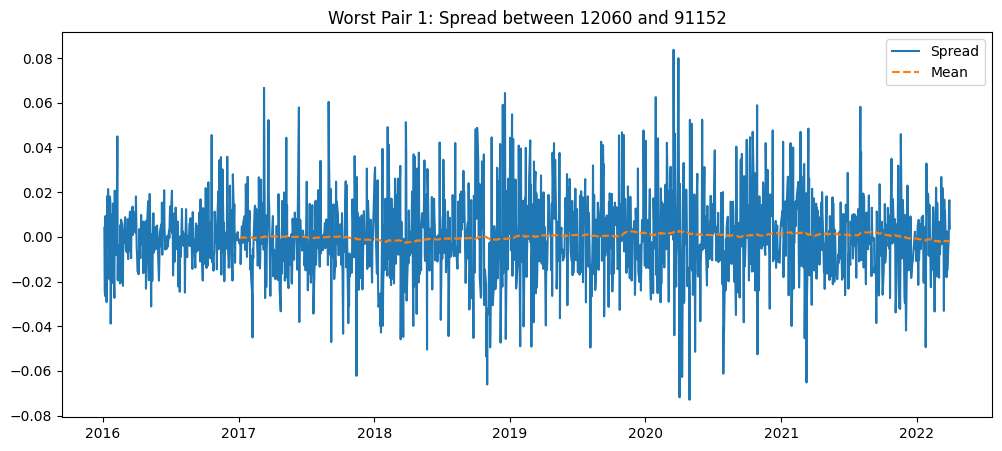

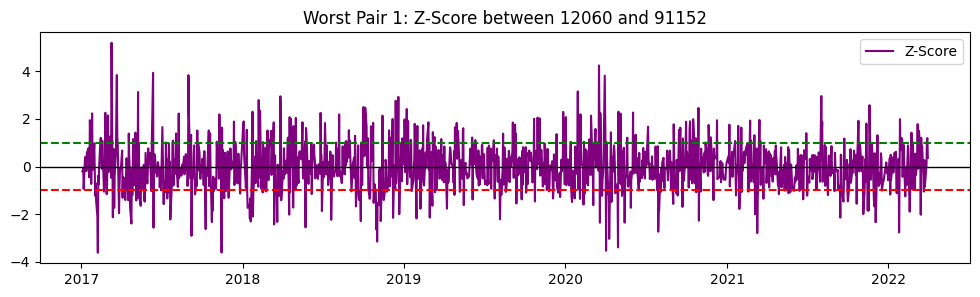

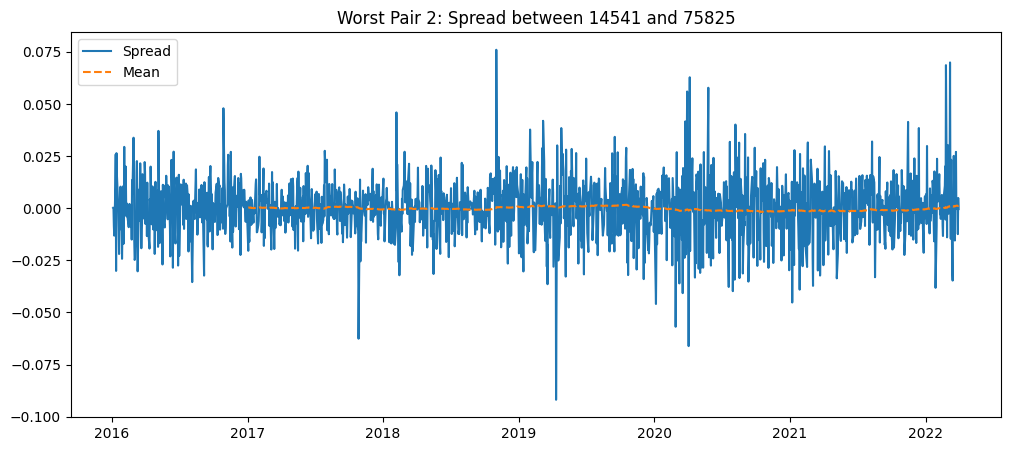

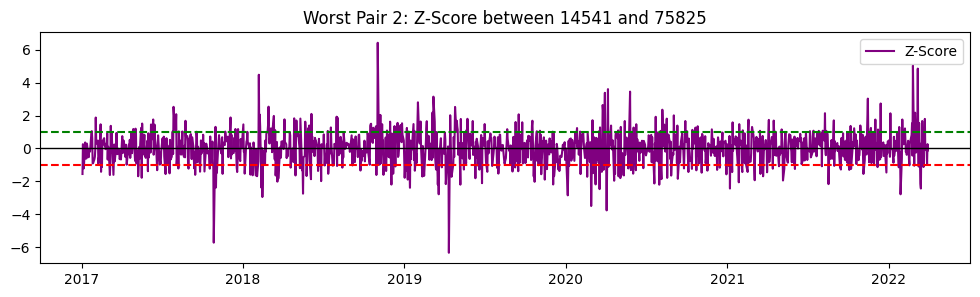

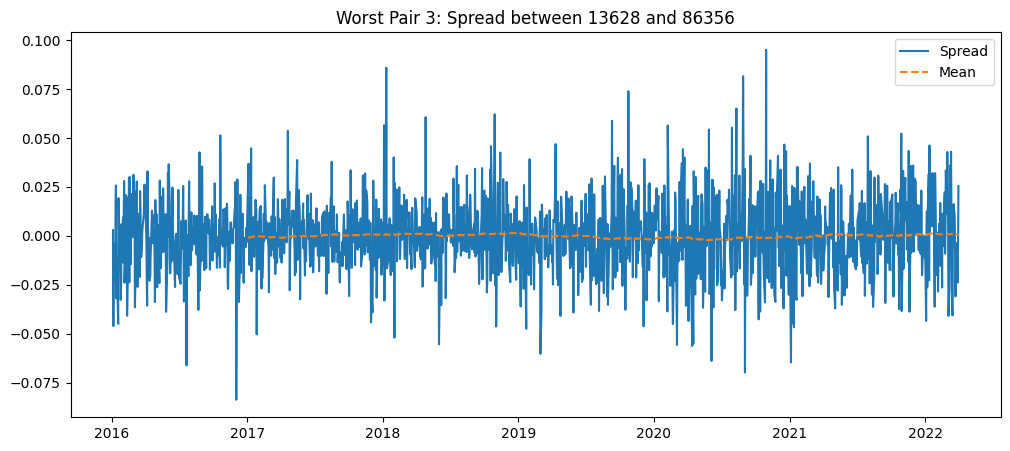

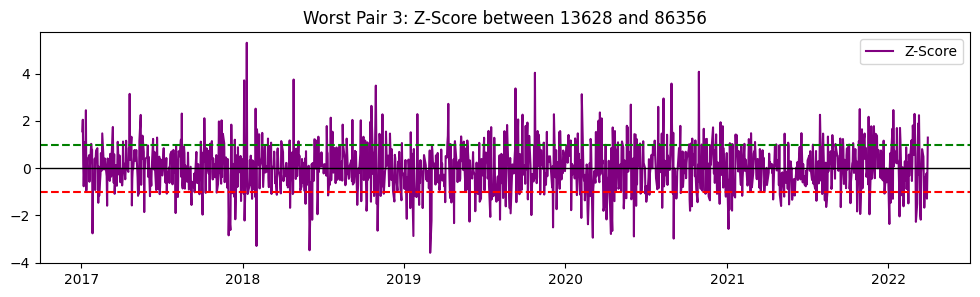

In [133]:
for i, ((p1, p2), _) in enumerate(worst_pairs):
    sp = idio_panel[p1] - idio_panel[p2]
    z = (sp - sp.rolling(252).mean()) / sp.rolling(252).std()

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(sp.index, sp, label='Spread')
    ax.plot(sp.index, sp.rolling(252).mean(), linestyle='--', label='Mean')
    ax.set_title(f'Worst Pair {i+1}: Spread between {p1} and {p2}')
    ax.legend()
    plt.show()

    fig, ax = plt.subplots(figsize=(12, 3))
    ax.plot(z.index, z, label='Z-Score', color='purple')
    ax.axhline(1, color='green', linestyle='--')
    ax.axhline(-1, color='red', linestyle='--')
    ax.axhline(0, color='black', lw=1)
    ax.set_title(f'Worst Pair {i+1}: Z-Score between {p1} and {p2}')
    ax.legend()
    plt.show()

In [134]:
bench = df[df['TICKER'].isin(['AAPL','MSFT'])]
bench_panel = bench.pivot_table(index='date', columns='TICKER', values='log_return', aggfunc='mean').dropna()
pnl_bench = backtest(bench_panel, [('AAPL','MSFT')])

In [135]:
freq = 252
perf = lambda x: {'ann_ret': x.sum(), 'ann_vol': x.std()*np.sqrt(freq), 'sharpe': x.mean()/x.std()*np.sqrt(freq)}
min_len = min(len(pnl_cluster), len(pnl_bench))
pnl_cluster, pnl_bench = pnl_cluster[-min_len:], pnl_bench[-min_len:]
print('Cluster:', perf(pnl_cluster))
print('Bench :', perf(pnl_bench))

Cluster: {'ann_ret': np.float64(-0.06749569807023022), 'ann_vol': np.float64(0.00805859732984712), 'sharpe': np.float64(-1.3426556287431053)}
Bench : {'ann_ret': np.float64(-0.17464575783371), 'ann_vol': np.float64(0.1494389616530211), 'sharpe': np.float64(-0.18734503969155805)}


In [136]:
print("Number of pairs:", len(pairs))
print("Idio panel shape:", idio_panel.shape)
print("Sample PnL cluster:\n", pnl_cluster.tail())

Number of pairs: 5927
Idio panel shape: (1573, 472)
Sample PnL cluster:
 date
2022-03-25    0.000163
2022-03-28    0.000127
2022-03-29   -0.000128
2022-03-30    0.000668
2022-03-31   -0.000549
dtype: float64
